<a href="https://colab.research.google.com/github/eunrod16/MachineDeepLearning/blob/master/ProyectoML2CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Clasificación Personajes de Simpsons


In [3]:
import torch  
import torch.nn as nn 
import torch.optim as optim 
import torch.nn.functional as F 
import torchvision 
import torchvision.transforms as transforms 
import torchvision.datasets as dset
from torch.utils import data as D
torch.set_printoptions(linewidth=120)

transform = transforms.Compose(
    [transforms.Resize((60,60)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data = dset.ImageFolder(root="/content/drive/My Drive/data/simpsons_dataset",transform=transform)
dataloader = torch.utils.data.DataLoader(data, batch_size=16,shuffle=True,num_workers=2)
"""dataiter = iter(dataloader)
images, labels = dataiter.next()"""

len(data.classes)

42

In [0]:
data.len=len(data)
train_len = int(0.7*data.len)
test_len = data.len - train_len
train_data, test_data = D.random_split(data, lengths=[train_len, test_len])
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1)
train_loader = torch.utils.data.DataLoader(train_data,batch_size=500,shuffle=True)

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.h1 = nn.Linear(in_features=32 * 15 * 15, out_features=200)
        self.h2 = nn.Linear(in_features=200, out_features=90)
        self.out = nn.Linear(in_features=90, out_features=42)
        
    def forward(self, x):
        # convolutional layer
        x = self.conv1(x)
        x = F.max_pool2d(F.relu(x), kernel_size=2,stride=2)

        # convolutional layer
        x = self.conv2(x)
        x = F.max_pool2d(F.relu(x), kernel_size=2,stride=2)

        # hiddens layer
        x = x.reshape(-1, 32 * 15 * 15)
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        return self.out(x)

In [0]:

def correctas(y_hat, labels):
    return y_hat.argmax(dim=1).eq(labels).sum().item()


In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNN()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
errores = []
epochs = 20
for epoch in range(epochs):

    totalCorrectas = 0
    batch = 0
    for images, labels in train_loader: 
        
        images = images.to(device)
        labels = labels.to(device)
        
        y_hat = model(images)
        loss = F.cross_entropy(y_hat, labels) 

        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        totalCorrectas += correctas(y_hat, labels)
        errores.append(loss.item())
        print("Epoch:", epoch, "Batch:", batch ,"Correctas:", correctas(y_hat, labels), "Loss:", loss.item())
    print("Total de Correctas:",totalCorrectas)

Epoch: 0 Batch: 0 Correctas: 48 Loss: 3.7321176528930664
Epoch: 0 Batch: 0 Correctas: 108 Loss: 3.5545945167541504
Epoch: 0 Batch: 0 Correctas: 104 Loss: 3.2609591484069824
Epoch: 0 Batch: 0 Correctas: 105 Loss: 3.133258581161499
Epoch: 0 Batch: 0 Correctas: 109 Loss: 2.905773878097534
Epoch: 0 Batch: 0 Correctas: 102 Loss: 2.7712042331695557
Epoch: 0 Batch: 0 Correctas: 88 Loss: 2.709794282913208
Epoch: 0 Batch: 0 Correctas: 76 Loss: 2.590338706970215
Epoch: 0 Batch: 0 Correctas: 70 Loss: 2.4585468769073486
Epoch: 0 Batch: 0 Correctas: 55 Loss: 2.457970380783081
Epoch: 0 Batch: 0 Correctas: 104 Loss: 2.414717197418213
Epoch: 0 Batch: 0 Correctas: 97 Loss: 2.4567272663116455
Epoch: 0 Batch: 0 Correctas: 141 Loss: 2.3311290740966797
Epoch: 0 Batch: 0 Correctas: 27 Loss: 2.431762933731079
Total de Correctas: 1403
Epoch: 1 Batch: 0 Correctas: 104 Loss: 2.2574849128723145
Epoch: 1 Batch: 0 Correctas: 126 Loss: 2.267388105392456
Epoch: 1 Batch: 0 Correctas: 151 Loss: 2.190566301345825
Epoch

In [8]:
def checkpointModel():
    torch.save(model.state_dict(), "bestModel.model")
    print("Checkpoint saved")
checkpointModel() 

Checkpoint saved


In [0]:
model_weights = torch.load("bestModel.model", map_location={'cuda:0': 'cpu', 'cuda:1' : 'cpu'})
def dibujarFiltritos(capa):
  fig = plt.figure()
  plt.figure(figsize=(8,8))
  for i, filtro  in enumerate(model_weights[capa]):
      #print(filt[0, :, :])
      plt.subplot(8,8, i + 1)
      plt.imshow(filtro[0, :, :])
      plt.axis('off')
  fig.show()

## Filter Conv1

<Figure size 432x288 with 0 Axes>

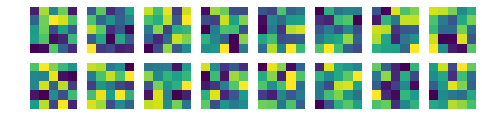

In [10]:
dibujarFiltritos('conv1.weight')

## Filter Conv2

<Figure size 432x288 with 0 Axes>

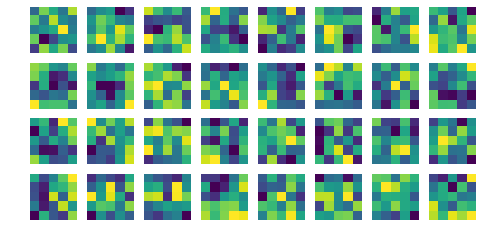

In [11]:
dibujarFiltritos('conv2.weight')

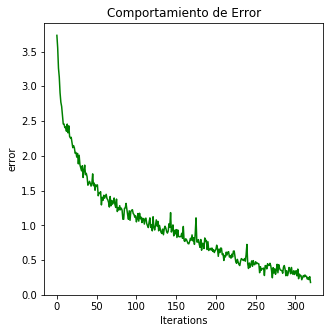

In [13]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_ylabel('error')
ax.set_xlabel('Iterations')
ax.set_title('Comportamiento de Error')
_=ax.plot(range(len(errores)),errores,'g')

## Conclusiones


*   La librería de torchvisón es muy buena para el manejo de imágenes como data y carpetas como labeles
*   Se utiliza la librería functional para operar las funciones de activación como tensores en las capas de max pooling.
*   Max Pooling nos sirve para comprimir y resumir 
*   La optimización se hace por medio de cross entropy por la diferencia de tamaños de las Y


